In [41]:
using ExprRules
using Plots
pgfplots()
include("LTLSampling.jl");

Define the LTL Grammar with "globally" and "eventually" operators

In [42]:
grammar = @grammar begin
    R = (R && R) | (R || R) # "and" and "or" expressions for scalar values
    R = all(τ) | any(τ)# τ is true everywhere or τ is eventually true
    R = all_before(τ, K) | all_after(τ, K)
    K = 50
    τ = (τ .& τ) | (τ .| τ) # "and" and "or" for boolean time series
    τ = (sym .< c) | (sym .> c) | (sym .== c)# Less than operation
    c = 0.01 | 0.25 | 0.5 | 0.75 | 0.99 # Constants for comparison
    sym = x | y
end

1: R = R && R
2: R = R || R
3: R = all(τ)
4: R = any(τ)
5: R = all_before(τ, K)
6: R = all_after(τ, K)
7: K = 50
8: τ = τ .& τ
9: τ = τ .| τ
10: τ = sym .< c
11: τ = sym .> c
12: τ = sym .== c
13: c = 0.01
14: c = 0.25
15: c = 0.5
16: c = 0.75
17: c = 0.99
18: sym = x
19: sym = y


Define two different action spaces. One for 1D and and one for 2D.

In [43]:
A1D = ActionSpace(:x => [-1,1])
A2D = ActionSpace(:x => [0,1], :y => [0,1]);

Set the number of timesteps in the trajectory and then sample some unconstrained trajectories from the action spaces

In [44]:
N = 100
a1_series = sample_series([A1D for i in 1:N])
a2_series = sample_series([A2D for i in 1:N]);

Example with 1D action space and simple constraints on values

In [52]:
rn1 = RuleNode(1, [RuleNode(6,[RuleNode(11, [RuleNode(18), RuleNode(15)]), RuleNode(7)]), RuleNode(4, [RuleNode(11, [RuleNode(18), RuleNode(17)])])])
ex1 = get_executable(rn1, grammar)
println(ex1)
constrained_series = sample_series(ex1, A1D, N)
plot(a1_series[:x], ylims = (-1,1), label="Unconstrained Series", size = (600,200), legend=:bottomright)
plot!(constrained_series[:x], label = "Constrained Series")
println(replace(replace(string(ex1), "&" =>"\\&"), "_" => "\\_")
# title!(string("Time Series Constrained by: ", replace(string(ex1), "&" =>"\\&")))


all_after(x .> 0.5, 50) && any(x .> 0.99)


LoadError: syntax: incomplete: premature end of input

Example with 2D action space

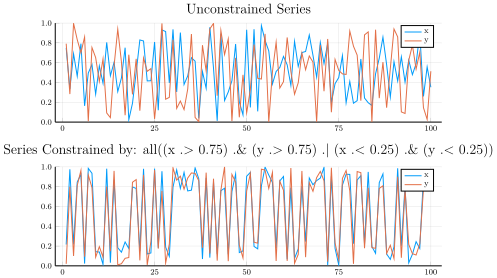

In [43]:
r = RuleNode
rn2 = r(3, [r(6, [r(5,[r(8,[r(15), r(13)]), r(8,[r(16), r(13)])]),r(5,[r(7,[r(15), r(11)]), r(7,[r(16), r(11)])])])])
ex2 = get_executable(rn2, grammar)
constrained_series = sample_series(ex2, A2D, N)
p1 = plot(a2_series[:x], ylims = (0,1), title="Unconstrained Series", label="x")
plot!(a2_series[:y], label="y")
p2 = plot(constrained_series[:x], ylims = (0,1), label="x", title = string("Series Constrained by: ", replace(string(ex2), "&" =>"\\&")))
plot!(constrained_series[:y], label="y")
plot(p1, p2, layout = (2,1))

A look inside:

In [23]:
N = 4
leaves = eval_conditional_tree(ex1, true, N)

2-element Array{Any,1}:
 Any[:(x .> 0.5), Any[true, true, true, true]]             
 Any[:(x .> 0.99), Any[:anybool, true, :anybool, :anybool]]

In [24]:
constraints = gen_constraints(leaves, N)

4-element Array{Array{Pair{Expr,Bool},1},1}:
 [:(x .> 0.5)=>true]                    
 [:(x .> 0.5)=>true, :(x .> 0.99)=>true]
 [:(x .> 0.5)=>true]                    
 [:(x .> 0.5)=>true]                    

In [25]:
action_spaces, valid = gen_action_spaces(A1D, constraints)
println(action_spaces[1].bounds)
println("Is Valid? ", valid)

OrderedDict(:x=>[0.5, 1.0])
Is Valid? true


Next steps:
* Combine this with GP to solve a problem where the ground truth expression is known
* Apply it to the AV scenario
* Change the sampling approach to incorporate gaussian processes instead of just uniform, independent samples
* Generative modelfor the sign language dataset?

Hangups:
* Best way to sample continuous values and then incorporate them into GP?
* Expression generation can fail with the grammar because the algorithm doesn't keep track of how deep it is until right before it has reached the last depth. Talk to Ritchie?